# Winter 2022 Data Science Intern Challenge

## Canidate: **Joanne Middour**

### Problem:

[Click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

Given some sample data, write a program to answer the following: 

> On Shopify, we have exactly *100 sneaker shops*, and each of these shops sells only *one model of shoe*. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30-day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?

## Imports

In [1]:
# Analysis Packages
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setting up environment to read data from url provided
#   If running this notebook with Google Colab
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

## Exploritory Data Analysis (EDA)

Read in the data and look at it to see what I have to work with.

Things to look for:
- How many observations are in this data?
- How many columns are in this data?
- What types of data do I have?
- What is the main column(s) I need to focus on that will be most helpful?
- Are there any outliers?
- If there are outliers, might have to remove them to get an accurate value.

In [3]:
def load_google_sheet(url, sheet):
    """
    This function loads the shared url of a Google Sheets file and the 
        specific spreadsheet needed and returns it in a pandas DataFrame

    Parameters
    ----------
        url   : hyperlink : shared hyperlink to the Google Sheets file
        sheet : string    : specific spreadsheet located in the file

    Returns
    -------
        df : pandas DataFrame
    """

    # Open the Google Sheets file at the url provided where the data is housed
    wb_file = gc.open_by_url(url)

    # Open just the sheet from the workbook needed for analysis
    sheet = wb_file.worksheet(sheet)

    # Get all the values from sheet 1
    data = sheet.get_all_values()

    # Read in the dataset as a pandas DataFrame
    df = pd.DataFrame(data)

    # Clean up the dataframe to have the first row be the column headers
    df.columns = df.iloc[0]

    # Remove the first row, since it is now our column header
    df = df.iloc[1:]

    return df

In [4]:
# Set up my parameter variables for my function
file_url = 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0'
sheet1 = 'Sheet1'

# Use my function to get the data I need from the provided link
orders = load_google_sheet(file_url, sheet1)

# Look at the number of observations and columns in the dataset
print(orders.shape)

# Look at the first five rows of the DataFrame
orders.head()

(5000, 7)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1,1,53,746,224,2,cash,2017-03-13 12:36:56
2,2,92,925,90,1,cash,2017-03-03 17:38:52
3,3,44,861,144,1,cash,2017-03-14 4:23:56
4,4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Since the data is not specifically stating that these are sneaker shops anywhere, and the instructions state there are 100 sneaker shops. I want to verify there are 100 unique shop ids in this dataset to verify accuracy.

In [5]:
# Verify number of unique shop ids
orders.shop_id.nunique()

100

In [6]:
# Check for any null values in the dataset
orders.isnull().sum()

0
order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [7]:
# Look at the column information
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   object
 1   shop_id         5000 non-null   object
 2   user_id         5000 non-null   object
 3   order_amount    5000 non-null   object
 4   total_items     5000 non-null   object
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


Based on looking at the information for the columns, not all columns are typed properly. Need to change the column data types for:
- order_id ---> integer
- shop_id ---> integer
- user_id ---> integer
- order_amount ---> integer
- total_items ---> integer
- created_at ---> datetime

In [8]:
# Create a list of the columns that need to be changed to integers
int_cols = ['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items']

# Change all integer coloumns to int data types
for i in int_cols:
    orders[i] = pd.to_numeric(orders[i])

# Change creatd_at to datetime
orders.created_at = pd.to_datetime(orders.created_at)

# Check my work
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [9]:
# Look at the statistics of the numerical data
orders.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


After looking at the statistical data, it is obvious that there are some outliers in the `order_amount` feature. I can assume that this is where the `AOV of $3145.13` came from. Since this is telling me that the mean (average) of this feature (column) is `$3145.1280`.

Based on just this little piece of information I can already infer that there are outliers in this data. Some things that alert me to this are:
- The mean is `3145.128000`
- However, the 50 percentile is only `284.000000`, 
- and the 75 percentile is only `390.000000`

I want to do further analysis to determine how to handle these outliers. 

### Feature Engineering

Adding an additional column to help get a better understanding of why the order totals might be so high.

In [18]:
# Add a new column with the price per sneaker in the order
for i in orders:
    orders['price_per_item'] = orders['order_amount'] / orders['total_items']

orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
1,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
2,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
3,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
4,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
5,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


### More EDA

Getting back to exploritory data analysis.

In [31]:
# Look at the top 10 values in the order_amount column
print(orders['order_amount'].value_counts().sort_index(ascending=False).head(10),
      '\n')

# Look at the top 10 values in the total_items column
orders['total_items'].value_counts().sort_index(ascending=False).head(10)

704000    17
154350     1
102900     1
77175      9
51450     16
25725     19
1760       1
1408       2
1086       1
1064       1
Name: order_amount, dtype: int64 



2000      17
8          1
6          9
5         77
4        293
3        941
2       1832
1       1830
Name: total_items, dtype: int64

In [32]:
# Set pandas options to show more rows before truncating
pd.options.display.max_rows = 100

# Look at the rows of the dataframe where the value in order amounts is >= 25725 
orders[orders['order_amount'] >= 25725].sort_values(by='order_amount', 
                                                    ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
16,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
2836,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
1437,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
2970,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
3333,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1363,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1603,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
4057,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
1105,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
2154,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0


In [33]:
print(
    f"""
    According to the data above, 
        the max value in the order_amount column of ${orders.order_amount.max():,.0f} 
        had a total of {orders.total_items.max()} sneakers with each order. 
        That would mean that each sneaker cost an average of ${
        orders.order_amount.max() / orders.total_items.max():,.0f}. 
    
    I know some sneakers can cost a lot but this seems a little too high.

    Now lets calculate some of the other values in these top 10 highest values,
    compared to the number of items in that order:
        - $154,350 with 6 items = average ${154350 / 6:,.2f} per sneaker 
        - $102,900 with 4 items = average ${102900 / 4:,.2f} per snealer
        - $ 77,175 with 3 items = average ${77175 / 3:,.2f} per sneaker
        - $ 51,450 with 2 items = average ${51450 / 2:,.2f} per sneaker
        - $ 25,725 with 1 item
    
    I don't know about anyone else, but $25,725 is not any price I have ever 
        seen for a pair of sneakers. This data does not appear to be accurate.
    """
)


    According to the data above, 
        the max value in the order_amount column of $704,000 
        had a total of 2000 sneakers with each order. 
        That would mean that each sneaker cost an average of $352. 
    
    I know some sneakers can cost a lot but this seems a little too high.

    Now lets calculate some of the other values in these top 10 highest values,
    compared to the number of items in that order:
        - $154,350 with 6 items = average $25,725.00 per sneaker 
        - $102,900 with 4 items = average $25,725.00 per snealer
        - $ 77,175 with 3 items = average $25,725.00 per sneaker
        - $ 51,450 with 2 items = average $25,725.00 per sneaker
        - $ 25,725 with 1 item
    
    I don't know about anyone else, but $25,725 is not any price I have ever 
        seen for a pair of sneakers. This data does not appear to be accurate.
    


In [34]:
# Now I want to look at the orders that were between $1000 and $1800
#   since those were also in the top 10 values
orders[orders['order_amount'].between(1000, 1800)].sort_values(by='order_amount', 
                                                         ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
1365,1365,42,797,1760,5,cash,2017-03-10 06:28:21,352.0
1368,1368,42,926,1408,4,cash,2017-03-13 02:38:34,352.0
1472,1472,42,907,1408,4,debit,2017-03-12 23:00:22,352.0
3539,3539,43,830,1086,6,debit,2017-03-17 19:56:29,181.0
4142,4142,54,733,1064,8,debit,2017-03-07 17:05:18,133.0
939,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,352.0
2988,2988,42,819,1056,3,cash,2017-03-03 09:09:25,352.0
3514,3514,42,726,1056,3,debit,2017-03-24 17:51:05,352.0


In [35]:
print(
    f"""
    According to the data above, lets calculate some of the other values in 
        these top 10 highest values, compared to the number of items in that order:
        - $1,760 with 5 items = average ${1760 / 5:,.2f} per sneaker 
        - $1,408 with 4 items = average ${1408 / 4:,.2f} per snealer
        - $1,086 with 6 items = average ${1086 / 6:,.2f} per sneaker
        - $1,064 with 8 items = average ${1064 / 8:,.2f} per sneaker
        - $1,056 with 3 items = average ${1056 / 3:,.2f} per sneaker
    
    $352 for a sneaker still seeems a little steep for me and even $181 does too
        but at least this is more reasonable than $25,725 each.
    """
)


    According to the data above, lets calculate some of the other values in 
        these top 10 highest values, compared to the number of items in that order:
        - $1,760 with 5 items = average $352.00 per sneaker 
        - $1,408 with 4 items = average $352.00 per snealer
        - $1,086 with 6 items = average $181.00 per sneaker
        - $1,064 with 8 items = average $133.00 per sneaker
        - $1,056 with 3 items = average $352.00 per sneaker
    
    $352 for a sneaker still seeems a little steep for me and even $181 does too
        but at least this is more reasonable than $25,725 each.
    


At this point I am going to just remove any orders over $1800 first to get a better look at the data in some visualizations. I really feel right now that that is the point were the data goes from somewhat reasonable to rediculious.

In [36]:
# Only keep rows where order_amount is less than $1800
orders2 = orders[orders['order_amount'] < 1800]

# Get the new shape of the dataset now
print(f'New size of DataFrame: {orders2.shape}\n')

# Look at the new top 10 value counts in the order amount column
orders2['order_amount'].value_counts().sort_index(ascending=False).head(10)

New size of DataFrame: (4937, 8)



1760    1
1408    2
1086    1
1064    1
1056    3
980     1
965     1
960     2
948     1
935     3
Name: order_amount, dtype: int64

In [37]:
# Look at the statistics of the numerical data after removing the top 6 outliers
orders2.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


## Visualizations

Create some visualizations to get a better look at the outliers in the order amounts column.

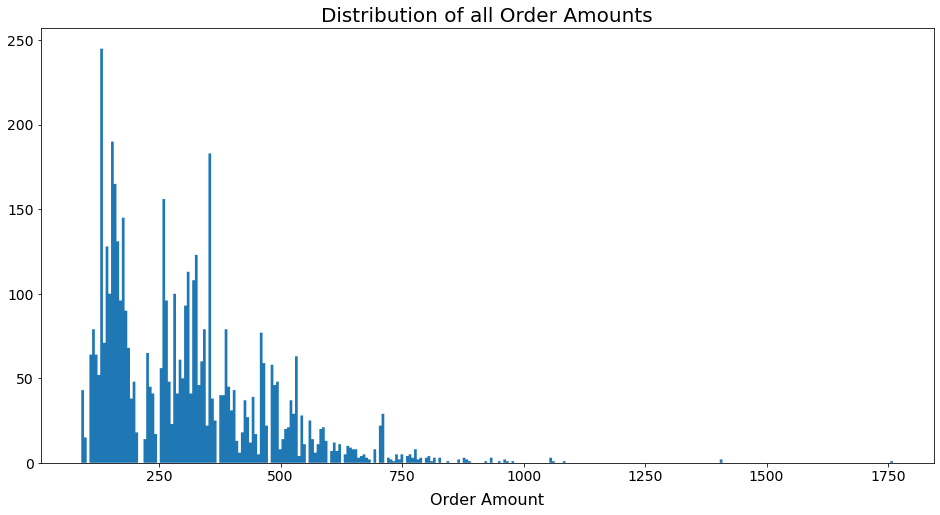

In [38]:
# Look at the outliers of the order amounts using a histogram
plt.figure(figsize=(16, 8))
plt.hist(orders2.order_amount, histtype='stepfilled', bins=300)
plt.title('Distribution of all Order Amounts', size=20)
plt.xticks(size=14)
plt.xlabel('Order Amount', size=16, labelpad=9)
plt.yticks(size=14);

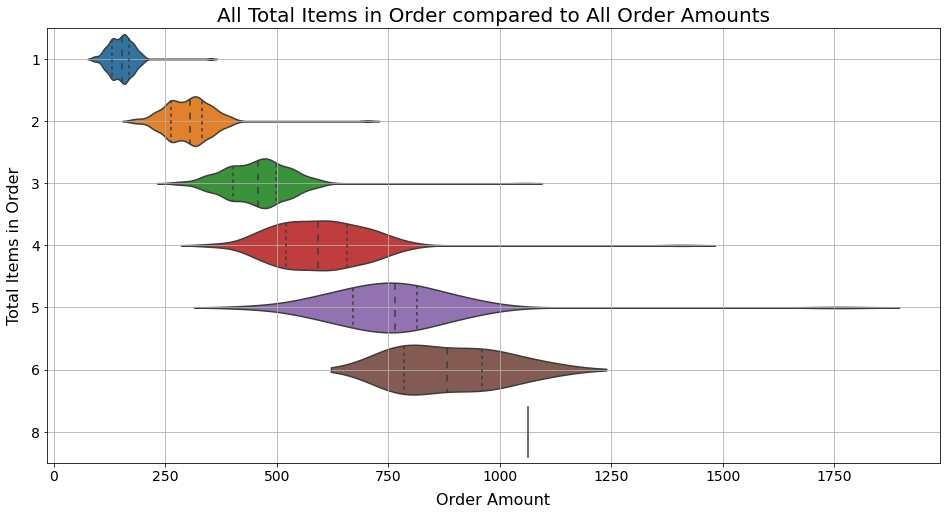

In [39]:
# Look at the outliers of the order amounts using a violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(x='order_amount', y='total_items', data=orders2, 
               scale='width', orient='h', inner='quartile')
plt.title('All Total Items in Order compared to All Order Amounts', size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Order Amount', size=16, labelpad=9)
plt.ylabel('Total Items in Order', size=16, labelpad=9)
plt.grid(True);

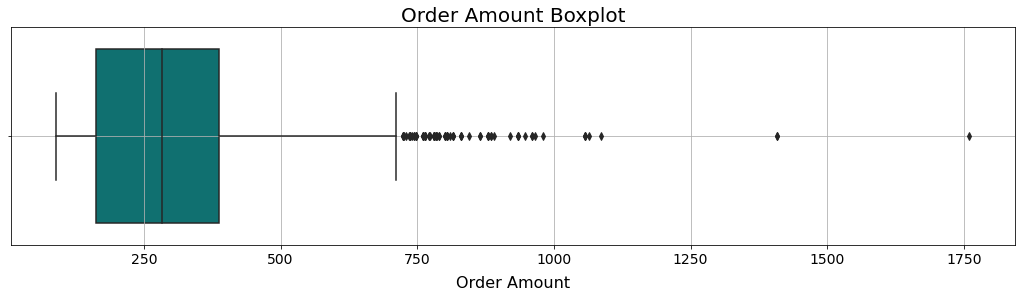

In [40]:
# Look at just the order amounts in a boxplot
plt.figure(figsize=(18, 4))
sns.boxplot(x=orders2['order_amount'], color='teal')
plt.title('Order Amount Boxplot', size=20)
plt.xticks(size=14)
plt.xlabel('Order Amount', size=16, labelpad=9)
plt.grid(True);

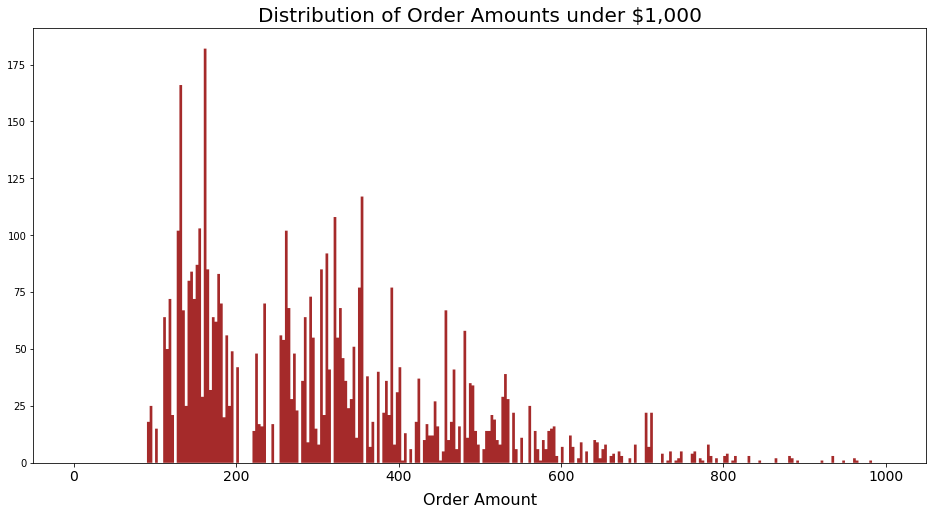

In [44]:
# Look at the outliers of the order amounts under 1,000 using a histogram
plt.figure(figsize=(16, 8))
plt.hist(orders2.order_amount, histtype='stepfilled', bins=300,
         range=(0, 1000), color='brown')
plt.title('Distribution of Order Amounts under $1,000', size=20)
plt.xticks(size=14)
plt.xlabel('Order Amount', size=16, labelpad=9)
plt.yticks;

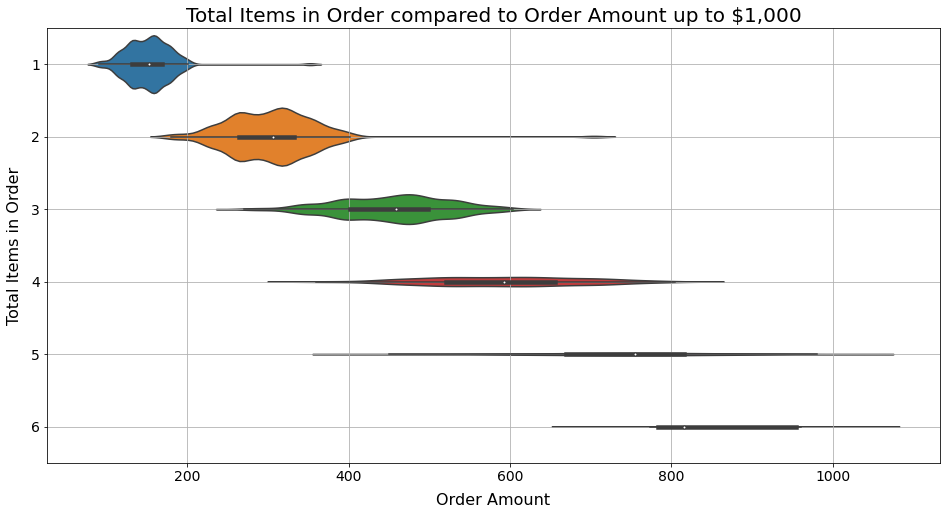

In [45]:
# Look at the outliers of the order amounts under 1,000 using a violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(x='order_amount', y='total_items', 
               data=orders2[orders2.order_amount < 1000],
               scale='count', orient='h')
plt.title('Total Items in Order compared to Order Amount up to $1,000', 
          size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Order Amount', size=16, labelpad=9)
plt.ylabel('Total Items in Order', size=16, labelpad=9)
plt.grid(True);

## Further Exploration

Based on analysis of the plots, I want to see what the total number of observations will be if I remove all the outliers over $1,000 to make sure there will still be enough data remaining to get an acurate calculation.

In [46]:
# Asssign new dataframe to a new variable for now just to check shape
less_orders = orders2[orders2['order_amount'] < 1000]

less_orders.shape[0]

4929

In [47]:
# Look at the statistics of the new dataframe
less_orders.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,4929.000000,4929.000000,4929.000000,4929.000000,4929.000000,4929.000000
mean,2499.687158,49.856563,849.803408,301.064313,1.990667,151.542706
std,1444.461268,29.083196,86.859493,156.151226,0.976133,28.200081
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1247.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3752.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,980.000000,6.000000,352.000000


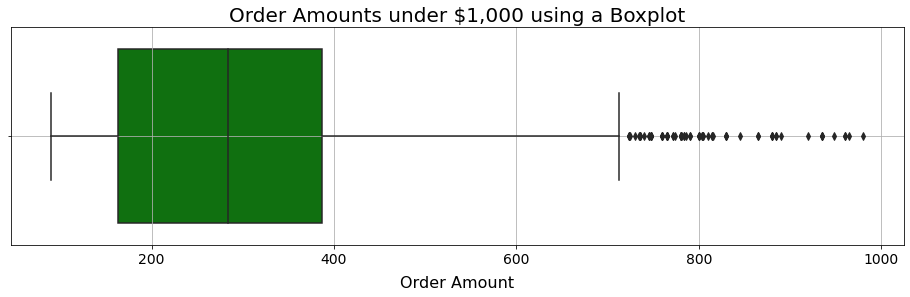

In [48]:
# Look at just the order amounts in a boxplot
plt.figure(figsize=(16, 4))
sns.boxplot(x=less_orders['order_amount'], color='green')
plt.title('Order Amounts under $1,000 using a Boxplot', size=20)
plt.xticks(size=14)
plt.xlabel('Order Amount', size=16, labelpad=9)
plt.grid(True);

In [49]:
# Look at the top 40 highest order amounts and the number of times they appear
less_orders.order_amount.value_counts().sort_index(ascending=False).head(40)

980     1
965     1
960     2
948     1
935     3
920     1
890     1
885     2
880     3
865     2
845     1
830     3
816     1
815     2
810     1
805     2
804     2
800     3
790     2
786     1
784     2
780     8
774     1
772     2
765     5
760     4
748     5
745     2
740     1
736     4
735     1
730     1
725     1
724     3
712    12
710    10
708     7
704    22
692     8
684     2
Name: order_amount, dtype: int64

In [50]:
# Remove more outliers and check shape again
less_orders = less_orders[less_orders['order_amount'] < 720]

print(f'Number of observations: {less_orders.shape[0]}')

# Look at the statistics now
less_orders.describe()

Number of observations: 4854


,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,2496.937989,49.849609,849.906675,293.270705,1.947672,151.249279
std,1443.497502,29.060742,86.876087,143.861331,0.916761,28.225952
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1244.250000,24.000000,776.000000,162.000000,1.000000,132.000000
50%,2497.500000,50.000000,850.000000,280.000000,2.000000,153.000000
75%,3748.750000,74.000000,925.000000,380.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,712.000000,5.000000,352.000000


## Comparisons with outliers and without

### The statistics of the original dataset:

In [89]:
def print_metrics(df, title):
    """
    Function to print out statistical metrics of the given DataFrame to help
        better visualize the analysis of the data.

    Parameters
    ----------
        df    : Dataframe : dataframe with the data needing statistics from
        title : string    : title of the print out in a string format

    Returns
    -------
        Print out of the included metrics for the given DataFrame
    """
    # Print the metrics of the original data
    return f"""
    {title}
    ----------------------------------------------------------------------------
        Number of observations:      {df.shape[0]}
    ----------------------------------------------------------------------------      
        Statistics on Total Items Purchased:

            Total of Number of Items Sold:  {df.total_items.sum():,.0f}
            Total Number of Unique Values:  {df.total_items.nunique():,.0f}
            Maximum Number of Items Sold:   {df.total_items.max():,.0f}
            Minimum Number of Items Sold:   {df.total_items.min():,.0f}
            Average Number of Items Sold:   {df.total_items.mean():,.0f}
            Median Number of Items Sold:    {df.total_items.median():,.0f}
            Standard Deviation:             {df.total_items.std():,.0f}
            25th Percentile:                {df.total_items.quantile(.25):,.0f}
            75th Percentile:                {df.total_items.quantile(.75):,.0f}
    ----------------------------------------------------------------------------
        Statistics on Price per Item:

            Total Number of Unique Values:   {df.price_per_item.nunique():,.0f}
            Maximum Price per Item:         ${df.price_per_item.max():,.2f}
            Minimum Price per Item:         ${df.price_per_item.min():,.2f}
            Average Price per Item:         ${df.price_per_item.mean():,.2f}
            Median Price per Item:          ${df.price_per_item.median():,.2f}
            Standard Deviation:             ${df.price_per_item.std():,.2f}
            25th Percentile:                ${df.price_per_item.quantile(.25):,.2f}
            75th Percentile:                ${df.price_per_item.quantile(.75):,.2f}
    ----------------------------------------------------------------------------      
        Statistics on Order Amounts:

            Total Amount of all Orders:     ${df.order_amount.sum():,.2f}
            Total Number of Unique Values:   {df.order_amount.nunique():,.0f}
            Maximum Value of Order:         ${df.order_amount.max():,.2f}
            Minimum Value of Order:         ${df.order_amount.min():,.2f}
            Average Order Value (AOV):      ${df.order_amount.mean():,.2f}
            Median Order Value:             ${df.order_amount.median():,.2f}
            Standard Deviation:             ${df.order_amount.std():,.2f}
            25th Percentile:                ${df.order_amount.quantile(.25):,.2f}
            75th Percentile:                ${df.order_amount.quantile(.75):,.2f}
    """

In [90]:
# Print the metrics of the original data
print(print_metrics(orders, 'Report for the orginal data provided:'))


    Report for the orginal data provided:
    ----------------------------------------------------------------------------
        Number of observations:      5000
    ----------------------------------------------------------------------------      
        Statistics on Total Items Purchased:

            Total of Number of Items Sold:  43,936
            Total Number of Unique Values:  8
            Maximum Number of Items Sold:   2,000
            Minimum Number of Items Sold:   1
            Average Number of Items Sold:   9
            Median Number of Items Sold:    2
            Standard Deviation:             116
            25th Percentile:                1
            75th Percentile:                3
    ----------------------------------------------------------------------------
        Statistics on Price per Item:

            Total Number of Unique Values:   58
            Maximum Price per Item:         $25,725.00
            Minimum Price per Item:         $90.00
  

### The statistics with just the top order amount removed:

In [91]:
# Print the metrics of the data, after removing just the top 6 outliers
print(print_metrics(orders2, 'Report after removing just the top 6 outliers:'))


    Report after removing just the top 6 outliers:
    ----------------------------------------------------------------------------
        Number of observations:      4937
    ----------------------------------------------------------------------------      
        Statistics on Total Items Purchased:

            Total of Number of Items Sold:  9,848
            Total Number of Unique Values:  7
            Maximum Number of Items Sold:   8
            Minimum Number of Items Sold:   1
            Average Number of Items Sold:   2
            Median Number of Items Sold:    2
            Standard Deviation:             1
            25th Percentile:                1
            75th Percentile:                3
    ----------------------------------------------------------------------------
        Statistics on Price per Item:

            Total Number of Unique Values:   57
            Maximum Price per Item:         $352.00
            Minimum Price per Item:         $90.00
   

### The statistics with the extreme outliers removed:

In [92]:
# Print the metrics of the data, after removing final outliers
print(print_metrics(less_orders, 'Report after removing final outliers:'))


    Report after removing final outliers:
    ----------------------------------------------------------------------------
        Number of observations:      4854
    ----------------------------------------------------------------------------      
        Statistics on Total Items Purchased:

            Total of Number of Items Sold:  9,454
            Total Number of Unique Values:  5
            Maximum Number of Items Sold:   5
            Minimum Number of Items Sold:   1
            Average Number of Items Sold:   2
            Median Number of Items Sold:    2
            Standard Deviation:             1
            25th Percentile:                1
            75th Percentile:                3
    ----------------------------------------------------------------------------
        Statistics on Price per Item:

            Total Number of Unique Values:   57
            Maximum Price per Item:         $352.00
            Minimum Price per Item:         $90.00
            

## Conclusion

After looking at the comparisons of the different verisions of the data with outliers removed, I have found that there is not much difference between removing only the top 6 outliers and the final amount of outliers. I could have actually stopped with removing just the top 6 outliers and still would have gotten a close approximation of the average order total. There is only a 3% difference between the average of the two sets of values. 

I have decided to make my final approximation on the final dataset called `less_orders` since there still is enough data to get an accurate average while being able to remove the outliers that appear to not happen frequently.

In the end, I conclude that the AOV is approximately $293.27